# **DSCI 100 Final Project**

**Section**: 004\
**Group**: 30\
**Members**: Victoria Chen (66263492), Saije Hans (73101313), Zhian Zhou (77230522), Charlotte Chen (60779865)

# <u> Introduction<u>

A research group in Computer Science at UBC has set up a MineCraft server to tackle the problem of predicting usage of a video game research server. By using the information in the given datasets - players.csv and sessions.csv - the following question can be answered: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In this study, we aim to answer the question: Can played hours and age predict the value of subscription in players? generated by specifying the broad question above. Our dataset of choice is the players.csv table; this database contains information related to connecting player characteristics and subscriptions together which is required to answer our question. We have chosen three specific variables to use to reach a conclusion: played_hours, age, and subscribe. 

1. played_hours: gaming hours of each individual
2. age: age of individual players in years
3. subscribe: whether or not the individual is subscribed to a game related newspaper

The aim of our project is to propose a model that concludes whether or not the number of hours played on this server as well as the age of the individual playing can be used to determine if a player will subscribe to the newsletter. We chose to avoid predictors in the dataset that were not relevant to the exact characteristics we wanted to experiment with to evaluate if it contributed to the likelihood of subscribing or not. For instance, the dataset included the following in addition to the variables listed above: 

- hashed email
- player name
- player experience
- player gender

These were all excluded in our observations. Thus we believe that the played hours, age, and subscription values are the best fit to conclude if a player is subscribed or not. 

## Background

## Question

### Broad Question

> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question

> Can `played_hours` and `Age` predict the value of `subscribe` in `players.csv`?

## Dataset Description

# <u>Methods & Results<u>

## 1. Loading Data

In [1]:
# Load tidyverse package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Download and read dataset
download.file("https://raw.githubusercontent.com/vichen15/dsci100-004-30-final-project/refs/heads/main/players.csv", destfile = "players.csv")
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## 2. Wrangling Data

In [3]:
# Select relevant variables
players <- players |>
  select(
      Age, played_hours, subscribe
  )

In [4]:
# Factorize response variable
players <- players |>
  mutate(
    subscribe = factor(subscribe)
  )

In [5]:
# Remove NA values from data
players <- players |> 
  filter(!is.na(Age), !is.na(played_hours))

head(players)

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE


## 3. Data Summary

In [6]:
# Calculate summary statistics for each variable
summary(players)

      Age         played_hours     subscribe  
 Min.   : 9.00   Min.   :  0.000   FALSE: 52  
 1st Qu.:17.00   1st Qu.:  0.000   TRUE :142  
 Median :19.00   Median :  0.100              
 Mean   :21.14   Mean   :  5.905              
 3rd Qu.:22.75   3rd Qu.:  0.600              
 Max.   :58.00   Max.   :223.100              

Using the `summary` command, we notice that:
- The most prevalent experience level of players is "Amateur", followed by "Veteran".
- The proportion of individuals subscribed to the newsletter is 144 / 196 = 73.47%.
- The average number of hours played is 5.846, yet the median is only 0.1.
- The mean (21.14) and median (19.00) ages are both approximately 20 years old.

## 4. Exploratory Visualization

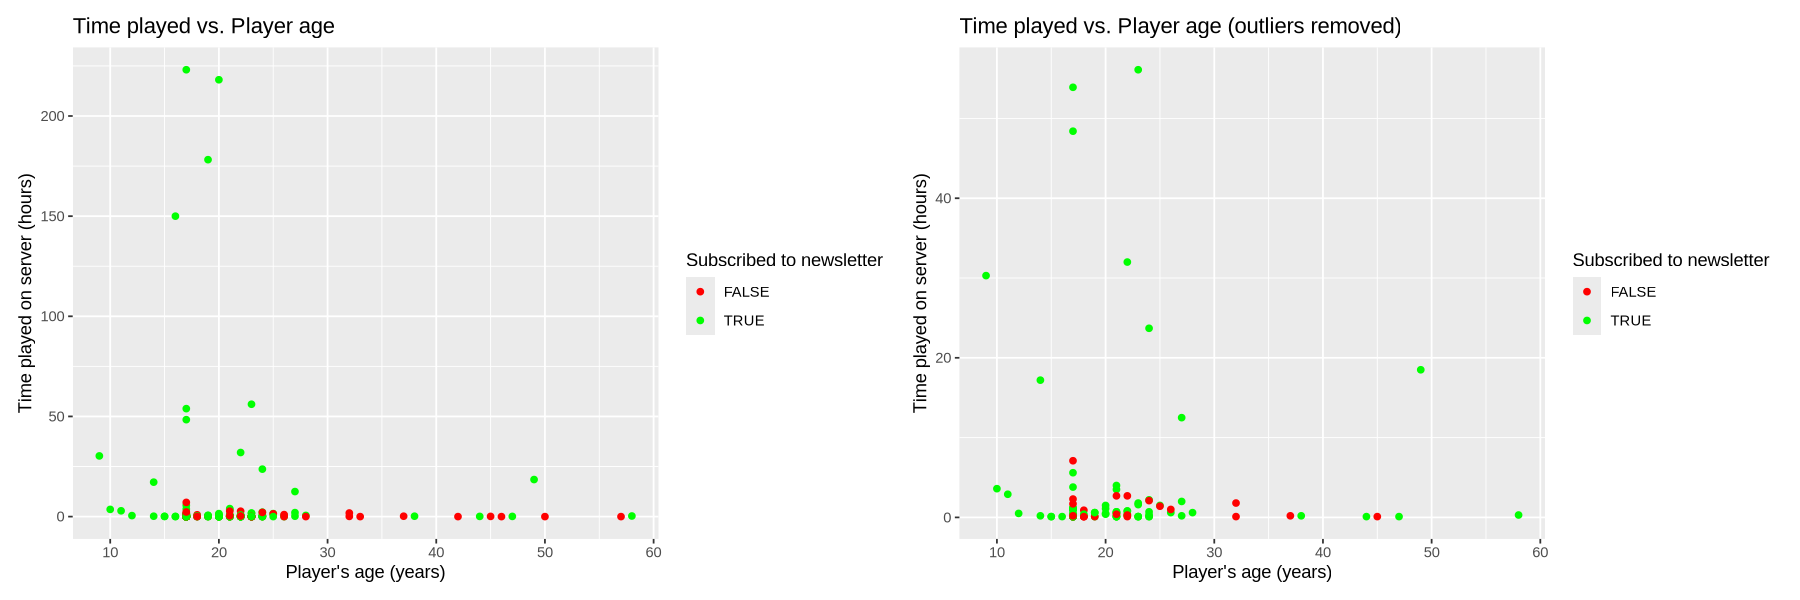

In [7]:
# Set-up
options(repr.plot.width = 15, repr.plot.height = 5)
library(patchwork)

# Remove NA values from data
players <- players |> 
  filter(!is.na(Age), !is.na(played_hours))

# Graph the relationship between time played, player age, and subscription status
time_age_1 <- players |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Time played vs. Player age",
       x = "Player's age (years)", 
       y = "Time played on server (hours)",
       color = "Subscribed to newsletter") +
  scale_color_manual(values = c("red", "green"))

# Remove extreme outliers from the data
played_hours_trimmed <- players |>
  filter(played_hours <= 100) |>
  filter(played_hours > 0)

# Graph the relationship again with the trimmed data
time_age_2 <- played_hours_trimmed |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Time played vs. Player age (outliers removed)",
       x = "Player's age (years)", 
       y = "Time played on server (hours)",
       color = "Subscribed to newsletter") +
  scale_color_manual(values = c("red", "green"))

# Print graphs side-by-side
time_age_1 + time_age_2

**Time played vs. Player age**
- We first started by creating a scatterplot by graphing `played_hours` against `Age`. We coloured the points red or green based on the value of `subscribe`.
- We found that almost all of the points were near zero on the y-axis and that more points were closer to zero on the x-axis as well.
- There were some high outliers of `played_hours` in this graph that made the rest of the values difficult to see.
- We were unable to make any conclusions from this graph.

**Time played vs. Player age (outliers removed)**
- To create this graph, we removed all points where `played_hours` exceeded 100 to get rid of the outliers.
- What we found after zooming in was that the majority of the data actually sat below 10 hours on the y-axis.
- we found that there was a cluster of points between 0-10 hours on the y-axis and between 10-30 years on the x-axis.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter

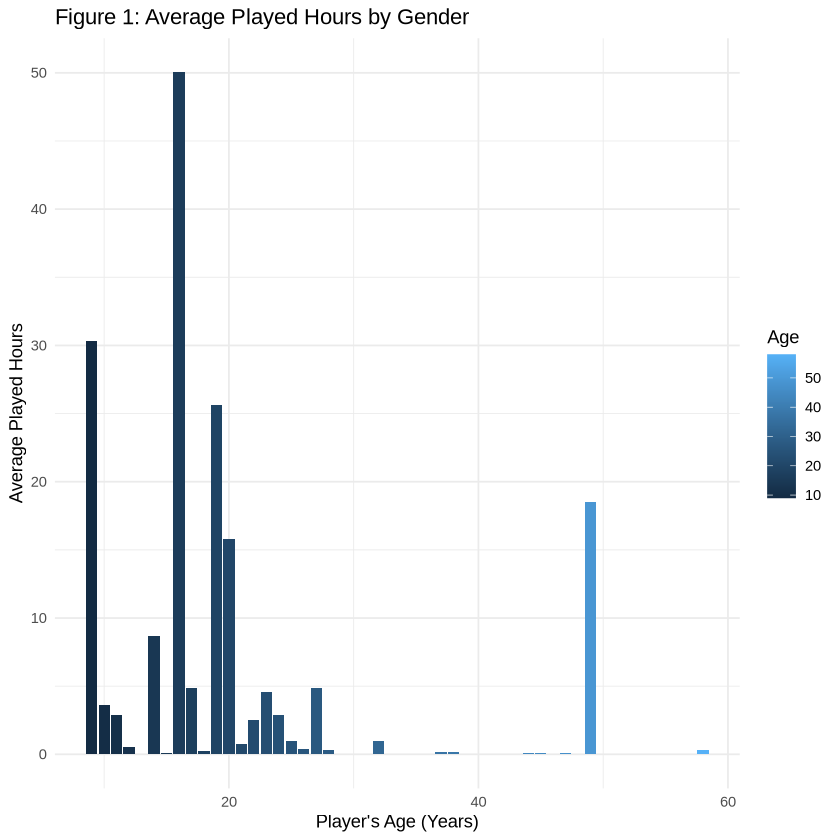

In [3]:
library(tidyverse)
table_1_data <- "players.csv"
table_1 <- read_csv(table_1_data)
table_1_tidy <- read_csv("players.csv") |>
  select(-hashedEmail, -name)
figure_1 <- ggplot(table_1_tidy, aes(x = Age, y = played_hours, fill = Age)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(
    x = "Player's Age (Years)",
    y = "Average Played Hours",
    title = "Figure 1: Average Played Hours by Gender"
  ) +
  theme_minimal()
figure_1

## 5. Data Analysis

## 6. Analysis Visualization

# <u>Discussion<u>

## Summary

## Expectations vs. Results

## Impact

## Future Questions

# <u>References<u>